Diego Salvatierra Guillermo 71468870

Del challenge pasado obtuvimos esta gráfica 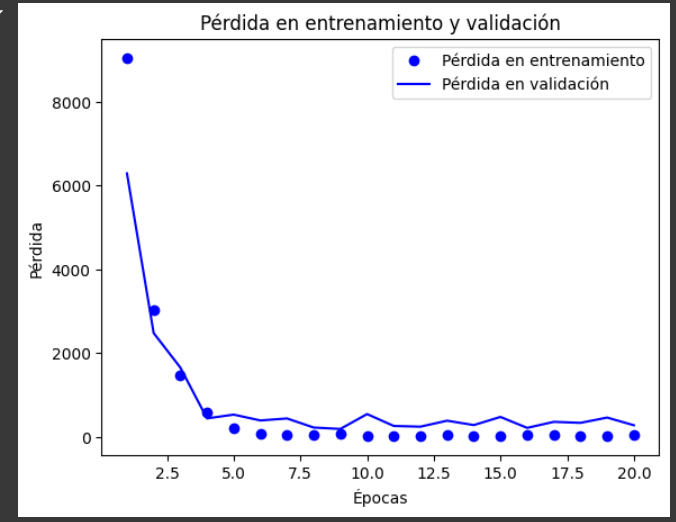

Lo cual nos indica que no hubo overfotting, pero el accuracy nos salió muy bajo, nos salió 0.65 por lo que ahora usaremos redes convulacionales. Debido a esto, ahora usaremos mas imagenes por cada clase. Usaremos 100 imagenes por clase


In [31]:
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import models, layers, optimizers
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import os


In [32]:

# Parámetros
img_height, img_width = 224, 224
batch_size = 32
num_classes = 4
epochs = 2


In [34]:
# Generadores de datos con aumento de datos para evitar sobreajuste
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Usar 20% de los datos para validación
)

# Generador de datos para entrenamiento
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Datos de entrenamiento
)

# Generador de datos para validación
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Datos de validación
)


Found 324 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [35]:
# Cargar el modelo VGG16 preentrenado sin las capas superiores
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Congelar las capas base del modelo
for layer in base_model.layers:
    layer.trainable = False

# Crear el modelo completo
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [36]:
model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [37]:
print(train_generator.class_indices)
print(validation_generator.class_indices)


{'.config': 0, '.ipynb_checkpoints': 1, 'brain_mri': 2, 'sample_data': 3}
{'.config': 0, '.ipynb_checkpoints': 1, 'brain_mri': 2, 'sample_data': 3}


In [38]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator
)


Epoch 1/2
10/10 [==============================] - 276s 28s/step - loss: 0.1577 - accuracy: 0.9212 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/2
10/10 [==============================] - 267s 27s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [39]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


3/3 [==============================] - 50s 15s/step - loss: 0.0000e+00 - accuracy: 1.0000
Loss: 0.0
Accuracy: 1.0


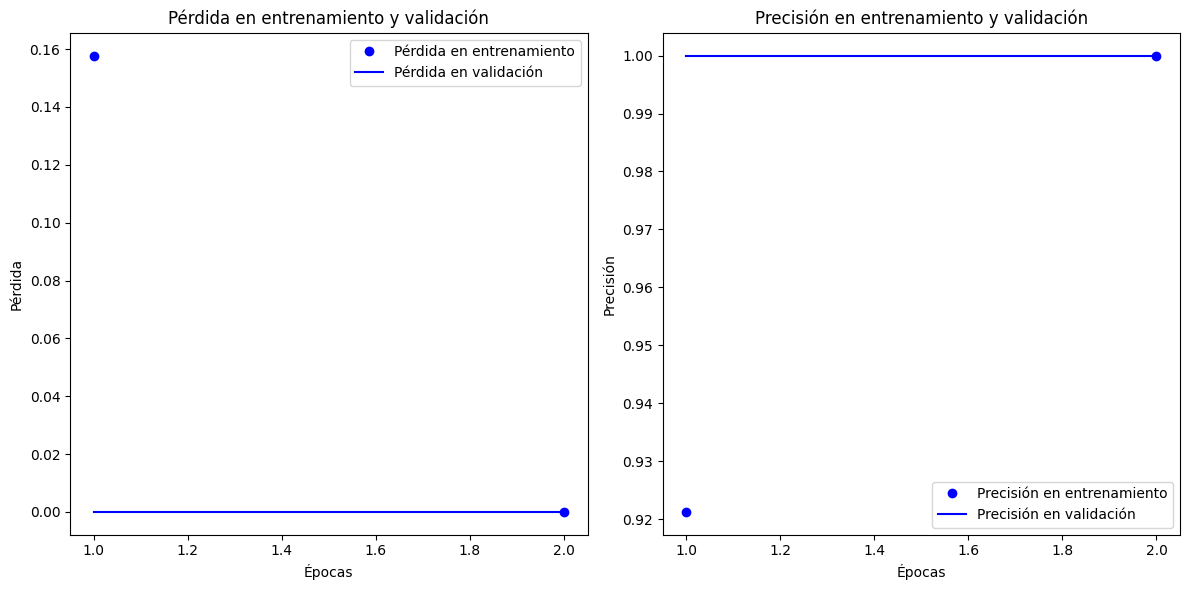

In [41]:
import matplotlib.pyplot as plt

# Plotear la pérdida durante el entrenamiento y la validación
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Pérdida en entrenamiento')
plt.plot(epochs, val_loss_values, 'b', label='Pérdida en validación')
plt.title('Pérdida en entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Plotear la precisión durante el entrenamiento y la validación
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values, 'bo', label='Precisión en entrenamiento')
plt.plot(epochs, val_acc_values, 'b', label='Precisión en validación')
plt.title('Precisión en entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


Podemos ver que tenemos unas buenas métricas en pérdidas y en precisión. También vemos qu eno hay overfitting . Y que no fue necesario usar muchos epoch.